In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime

In [7]:
NP_use = pd.read_csv('Data/National Park Public Use Statistics.csv', sep = ',', skiprows = [0,1,2], thousands=',')
NP_use.tail()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
29934,Zion NP,ZION,National Park,Intermountain,UT,2019,8,535322,1860,3535992,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619
29935,Zion NP,ZION,National Park,Intermountain,UT,2019,9,497443,1800,3144084,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619
29936,Zion NP,ZION,National Park,Intermountain,UT,2019,10,429604,1860,2736509,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619
29937,Zion NP,ZION,National Park,Intermountain,UT,2019,11,230180,1800,1543130,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619
29938,Zion NP,ZION,National Park,Intermountain,UT,2019,12,171706,1860,1058308,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619


In [8]:
rec_visit = NP_use[['Month', 'Year','ParkName', 'ParkType', 'Region', 'State','RecreationVisits']]


In [9]:
rec_visit.tail()

,Month,Year,ParkName,ParkType,Region,State,RecreationVisits
29934,8,2019,Zion NP,National Park,Intermountain,UT,535322
29935,9,2019,Zion NP,National Park,Intermountain,UT,497443
29936,10,2019,Zion NP,National Park,Intermountain,UT,429604
29937,11,2019,Zion NP,National Park,Intermountain,UT,230180
29938,12,2019,Zion NP,National Park,Intermountain,UT,171706


In [10]:
max_visit = rec_visit.loc[rec_visit.groupby([rec_visit.ParkName ,rec_visit.Year])['RecreationVisits'].idxmax()]
max_visit.head()

,Month,Year,ParkName,ParkType,Region,State,RecreationVisits
5,6,1979,Acadia NP,National Park,Northeast,ME,543205
19,8,1980,Acadia NP,National Park,Northeast,ME,633067
31,8,1981,Acadia NP,National Park,Northeast,ME,616233
42,7,1982,Acadia NP,National Park,Northeast,ME,737860
54,7,1983,Acadia NP,National Park,Northeast,ME,916474


In [11]:
#Trying to do something with Region and nothing is working
rec_visit.Region.unique()

array(['Northeast ', 'Intermountain ', 'Midwest ', 'Southeast ',
       'Pacific West ', 'Alaska'], dtype=object)

In [12]:
#Strip trailing spaces
rec_visit['Region'] = rec_visit['Region'].str.strip()
rec_visit['Region'].unique()

<ipython-input-12-d1a0248df226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_visit['Region'] = rec_visit['Region'].str.strip()


array(['Northeast', 'Intermountain', 'Midwest', 'Southeast',
       'Pacific West', 'Alaska'], dtype=object)

In [13]:
rec_visit.Year.value_counts()

2015    744
2002    744
2007    744
2008    744
2019    744
2009    744
2003    744
2010    744
2018    744
2011    744
2012    744
2017    744
2013    744
2016    744
2014    744
2006    744
1986    732
1989    732
1987    732
2001    732
1985    732
1988    732
2000    732
2004    732
1992    732
1990    732
1991    732
1999    732
1993    732
1994    732
1995    732
1997    732
1998    732
2005    731
1996    720
1982    720
1983    720
1984    720
1979    660
1980    660
1981    660
Name: Year, dtype: int64

In [14]:
max_ever = rec_visit.loc[rec_visit.groupby([rec_visit.ParkName])['RecreationVisits'].idxmax()]
max_ever.head()

,Month,Year,ParkName,ParkType,Region,State,RecreationVisits
127,8,1989,Acadia NP,National Park,Northeast,ME,1045060
977,6,2019,Arches NP,National Park,Intermountain,UT,225206
1134,7,1991,Badlands NP,National Park,Midwest,SD,363803
1958,3,2019,Big Bend NP,National Park,Intermountain,TX,83826
2325,10,2008,Biscayne NP,National Park,Southeast,FL,113151


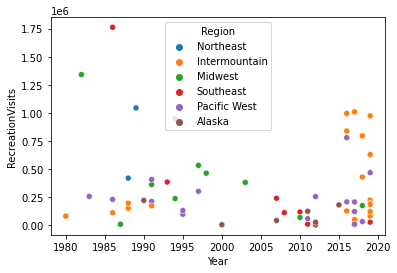

In [15]:
#intermountain and pacific west may have an increase after 2015
_ = sns.scatterplot(x= 'Year', y= 'RecreationVisits', hue= 'Region', data = max_ever)

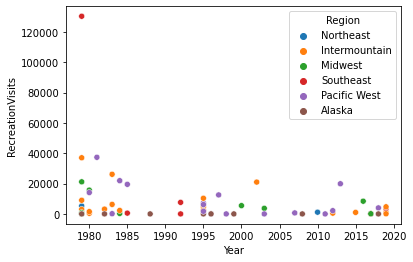

In [16]:
min = rec_visit.loc[rec_visit.groupby([rec_visit.ParkName])['RecreationVisits'].idxmin()]
_ = sns.scatterplot(x= 'Year', y= 'RecreationVisits', hue= 'Region', data = min)

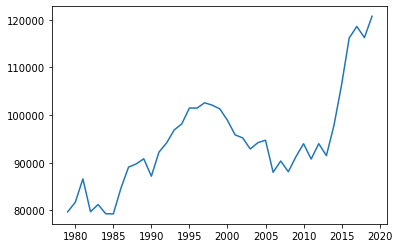

In [17]:
yearly_mean_all = pd.DataFrame(rec_visit.groupby(rec_visit.Year)['RecreationVisits'].mean())
_ = plt.plot(yearly_mean_all)

In [18]:
yearly_Park_mean = pd.DataFrame(rec_visit.groupby([rec_visit.ParkName ,rec_visit.Year])['RecreationVisits'].mean())
yearly_Park_mean.head()

RecreationVisits
ParkName  Year                  
Acadia NP 1979     232280.500000
          1980     231638.833333
          1981     249831.000000
          1982     297676.166667
          1983     343719.916667

In [19]:
# are some states NP's becoming more popular over time?  


State summary

<AxesSubplot:xlabel='State'>

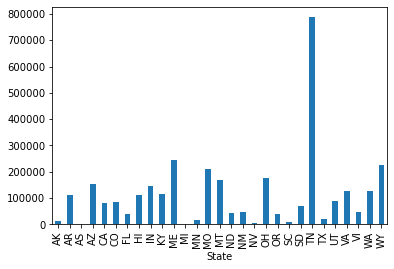

In [20]:
state = pd.DataFrame(rec_visit.groupby('State')['RecreationVisits'].mean())
state.reset_index()
state.RecreationVisits.plot(kind = 'bar')

<AxesSubplot:>

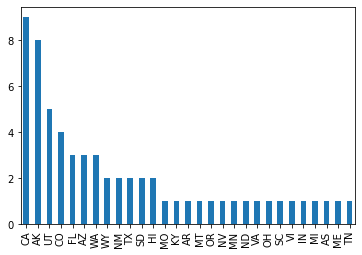

In [25]:
state_count = pd.DataFrame(max_ever['State'].value_counts())
state_count.reset_index()
state_count.State.plot(kind= 'bar')